In [1]:
import tensorflow as tf
import numpy as np
import IPython.display
import glob
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt

# Clean Voices

In [9]:
clean_sounds = glob.glob('data/clean_trainset_28spk_wav/*')

clean_sounds_list,_ = tf.audio.decode_wav(tf.io.read_file(clean_sounds[0]),desired_channels=1)
for i in tqdm(clean_sounds[10001:]):
  so,_ = tf.audio.decode_wav(tf.io.read_file(i),desired_channels=1)
  clean_sounds_list = tf.concat((clean_sounds_list,so),0)


100%|██████████| 1571/1571 [01:12<00:00, 21.77it/s]


In [3]:
clean_sounds_list.shape

TensorShape([697887749, 1])

In [10]:
batching_size = 12000

clean_train = []

for i in tqdm(range(0,clean_sounds_list.shape[0]-batching_size,batching_size)):
  clean_train.append(clean_sounds_list[i:i+batching_size])


100%|██████████| 17573/17573 [00:03<00:00, 5149.83it/s]


In [11]:
clean_train = tf.stack(clean_train)
clean_train_numpy = clean_train.numpy()
np.save("data/12k-batch/set3.npy", clean_train_numpy)


<tf.Tensor: shape=(), dtype=int32, numpy=44100>

# Noisy Voices

In [4]:
noisy_sounds = glob.glob('data/long/noise/*')

noisy_sounds_list,_ = tf.audio.decode_wav(tf.io.read_file(noisy_sounds[0]),desired_channels=1)
for i in tqdm(noisy_sounds[1:]):
  so,_ = tf.audio.decode_wav(tf.io.read_file(i),desired_channels=1)
  noisy_sounds_list = tf.concat((noisy_sounds_list,so),0)

# clean_sounds_list.shape,noisy_sounds_list.shape

100%|██████████| 1216/1216 [04:05<00:00,  4.95it/s]


In [5]:
batching_size = 12000

noisy_train = []

for i in tqdm(range(0,noisy_sounds_list.shape[0]-batching_size,batching_size)):
  noisy_train.append(noisy_sounds_list[i:i+batching_size])




100%|██████████| 89449/89449 [00:16<00:00, 5525.40it/s]


In [6]:
noisy_train = tf.stack(noisy_train)
noisy_train_np = noisy_train.numpy()
np.save("data/12k-batch/mset1n.npy", noisy_train_np)

# Analsys

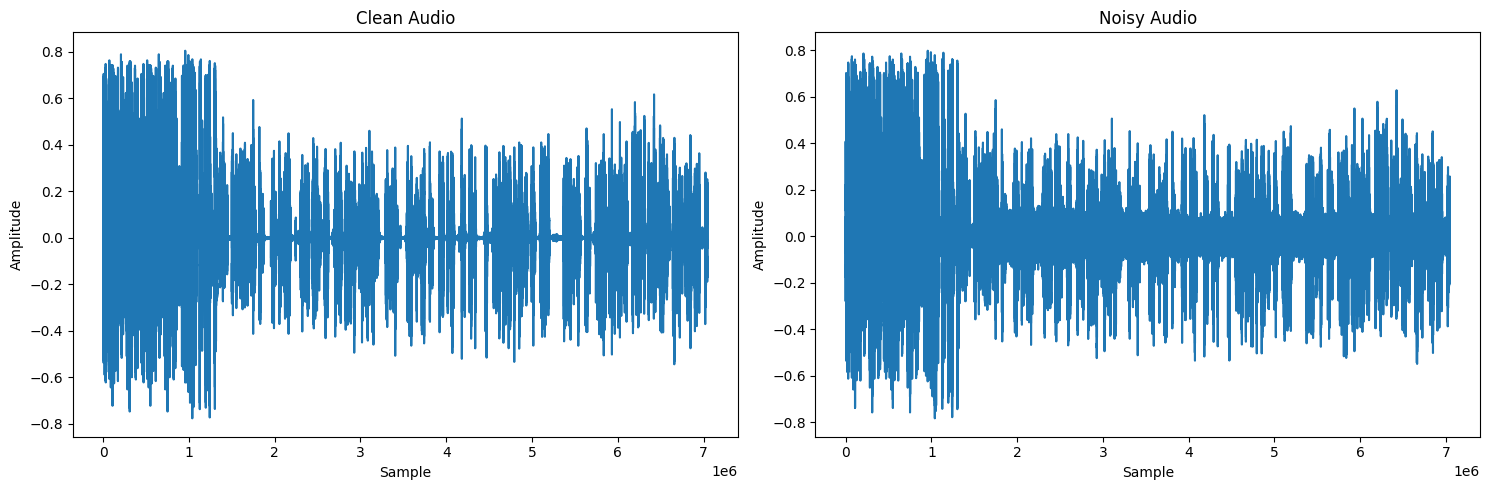

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

# Plot clean audio
plt.subplot(1,2,1)
plt.plot(clean_train_numpy.flatten())
plt.title('Clean Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot noisy audio 
plt.subplot(1,2,2)
plt.plot(noisy_train_np.flatten())
plt.title('Noisy Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

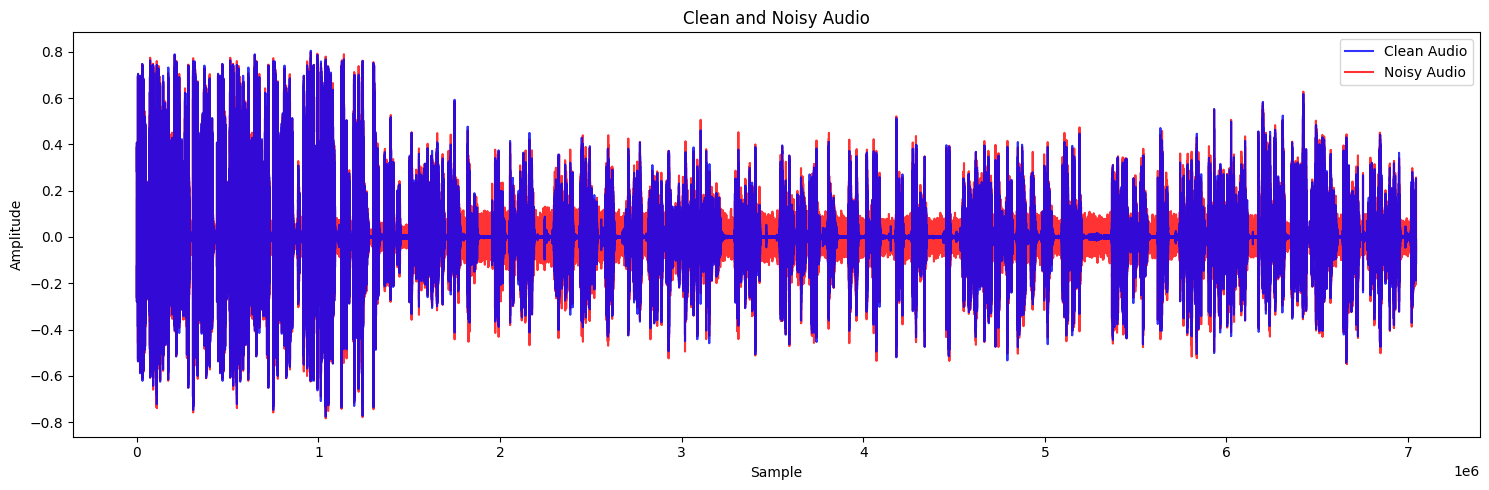

In [12]:
plt.figure(figsize=(15,5))

plt.plot(clean_train_numpy.flatten(), label='Clean Audio', color='blue', alpha=0.8, zorder=2)

plt.plot(noisy_train_np.flatten(), label='Noisy Audio', color='red', alpha=0.8, zorder=1)

plt.title('Clean and Noisy Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

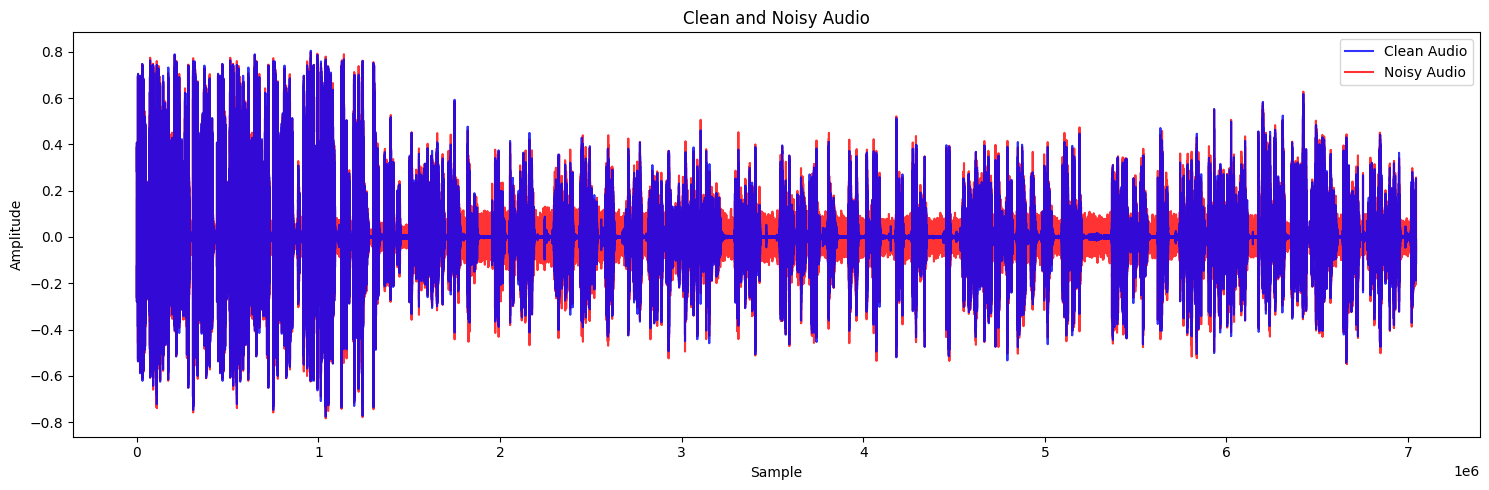

In [15]:
plt.figure(figsize=(15,5))

# Clean audio plot
plt.plot(clean_train_numpy.flatten(), label='Clean Audio', color='blue', alpha=0.8, zorder=3, linestyle='-')

# Noisy audio plot
plt.plot(noisy_train_np.flatten(), label='Noisy Audio', color='red', alpha=0.8, zorder=1, linestyle='-')

plt.title('Clean and Noisy Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()